# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [146]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [147]:
print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [148]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [149]:
data=pd.DataFrame(boston['data'], columns=[boston['feature_names']])
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [150]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

In [151]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [152]:
boston_df = pd.DataFrame(boston['data'], columns=[boston['feature_names']])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


El conjunto de datos posee un listado de características de las viviendas en la ciudad de Boston, MA tales como: tasa de criminalidad de la zona, cercanía al río, accesibilidad a rutas, impuestos, entre otras.

La variable objetivo a predecir es la mediana del valor de las propiedades en Boston.

Los atributos que se encuentran disponibles para predecir la variable son todas las características del dataset antes mencionadas. Algunas de ellas se podrían etiquetar como polémicas, o que refieren a temáticas sensibles. Ejemplo de esto sería la cantidad de personas negras en la zona.

Los atributos mas determinantes para el precio serían aquellos relacionados con aquellas características que hacen a la comodidad de una vivienda, en primera instancia. Por ejemplo: accesibilidad a rutas, cantidad de habitaciones, distancia al centro, antigüedad de la vivienda.

Sin dudas, el dataset posee información sensible. Algunas variables hacen alusión a temas polémicos tales como la cantidad de personas negras por barrio y la contaminación en el aire.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Text(0.5, 1.0, 'LSTAT')

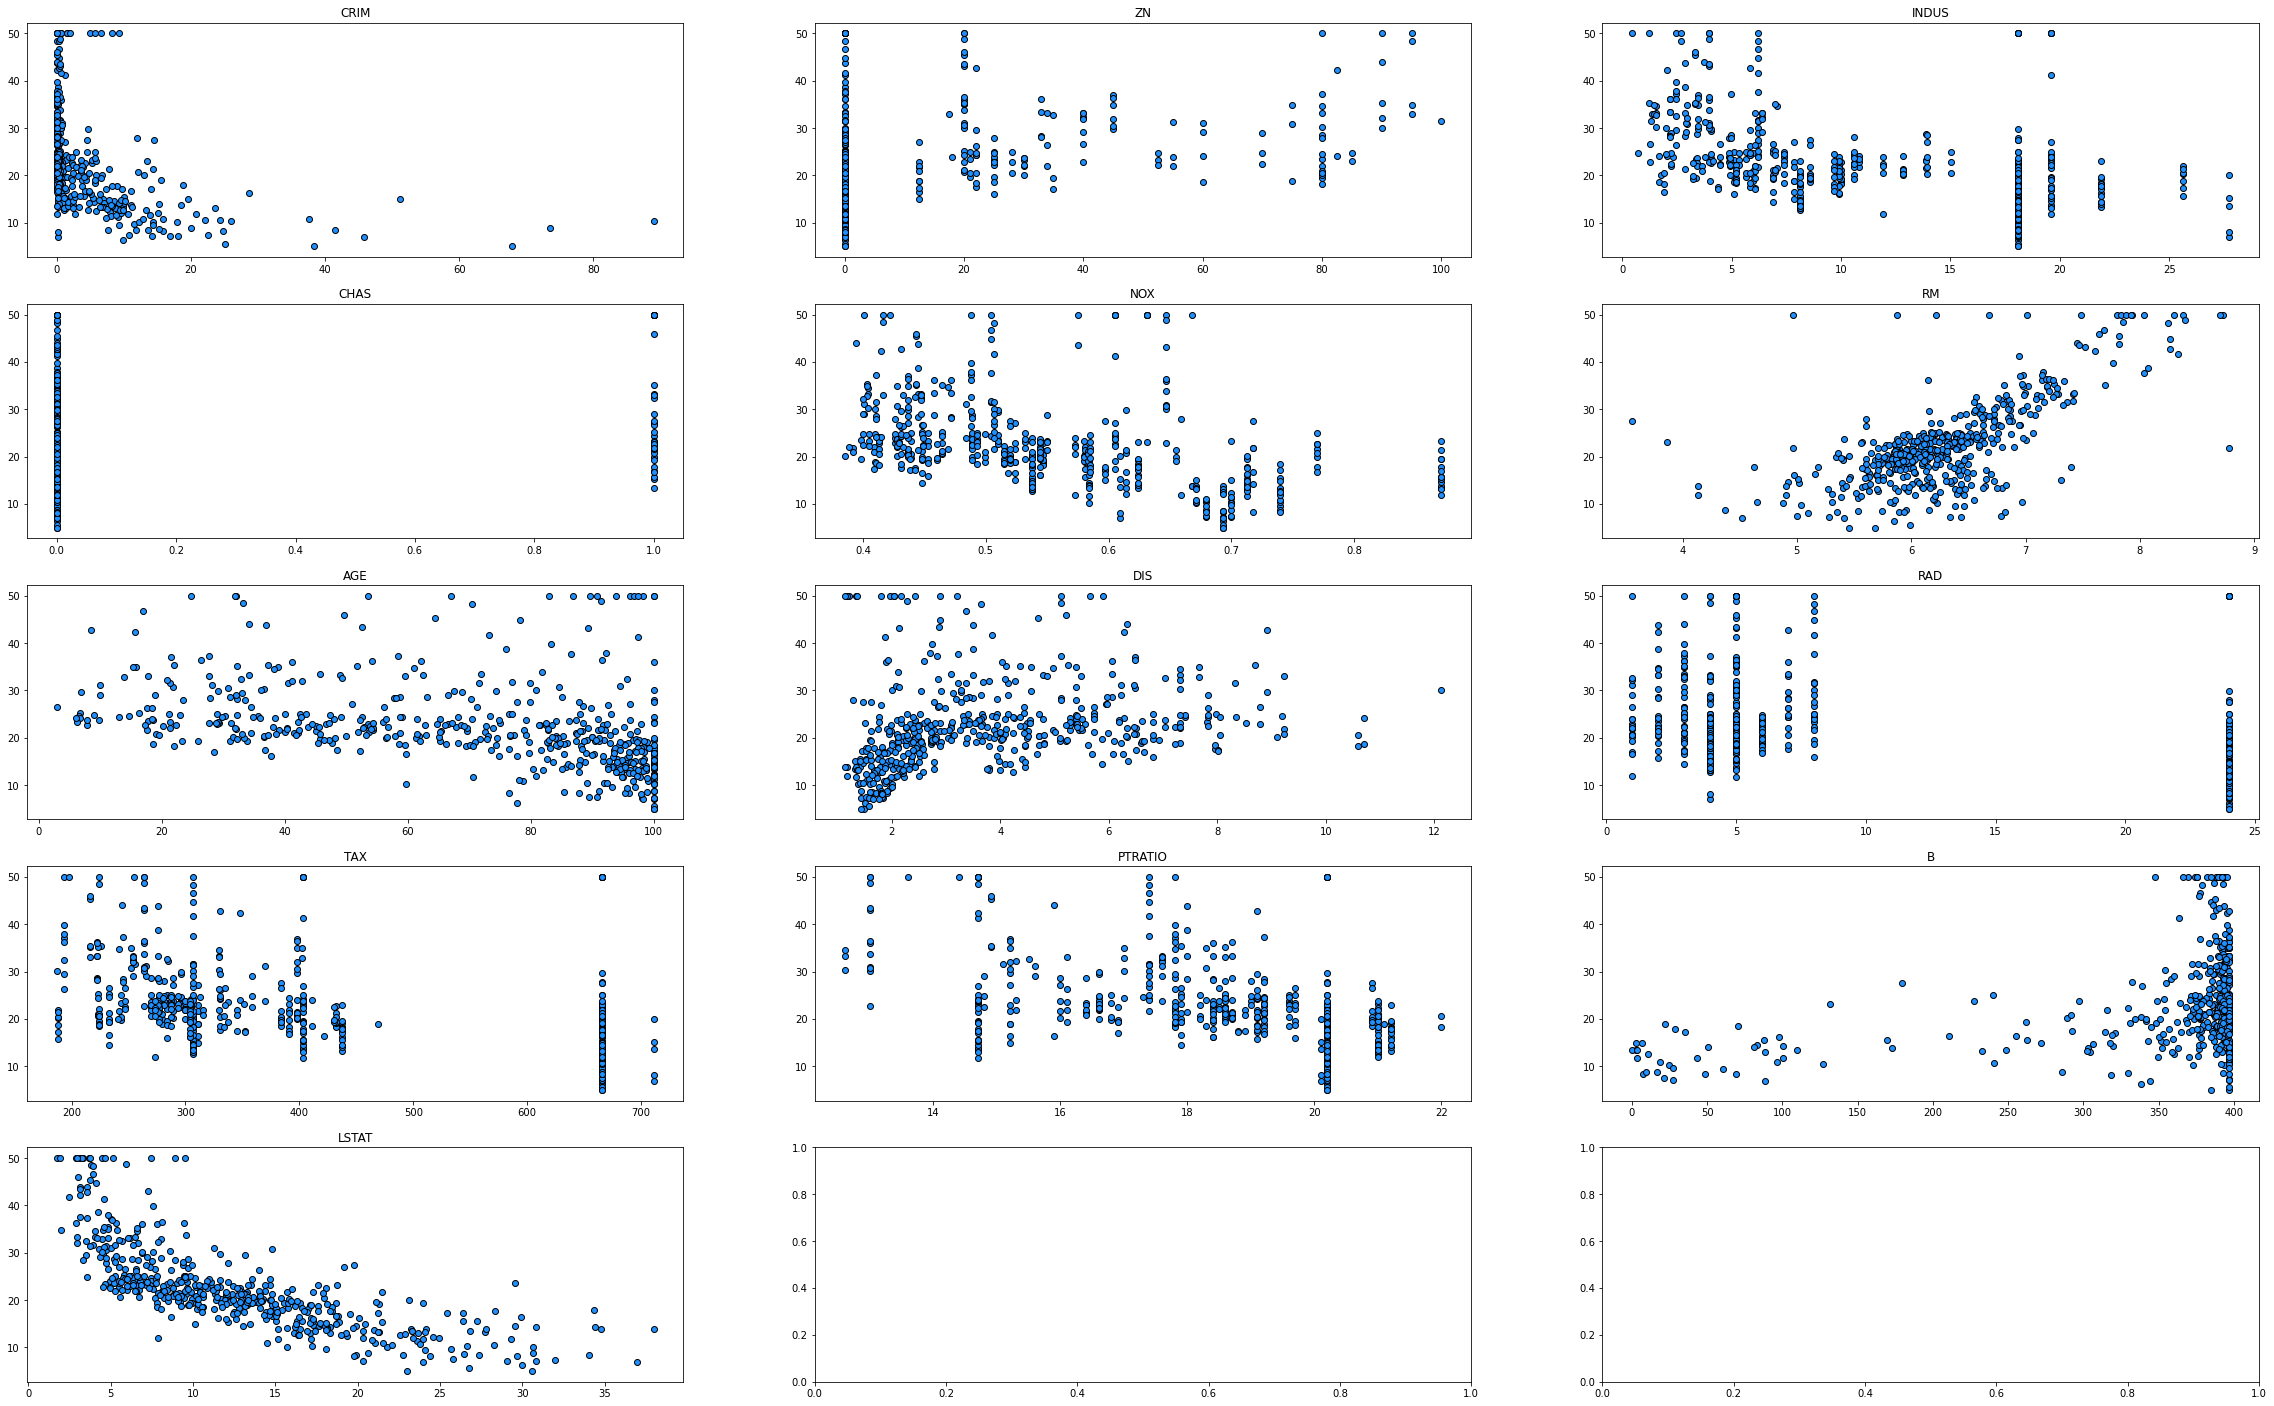

In [153]:
fig, axs = plt.subplots(5,3, figsize = (40,25))
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
axs[0,0].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[0,0].set_title('CRIM')
feature2 = 'ZN'
selector2 = (boston['feature_names'] == feature2)
axs[0,1].scatter(X[:, selector2], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[0,1].set_title('ZN')
feature3 = 'INDUS'
selector3 = (boston['feature_names'] == feature3)
axs[0,2].scatter(X[:, selector3], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[0,2].set_title('INDUS')
feature4 = 'CHAS'
selector4 = (boston['feature_names'] == feature4)
axs[1,0].scatter(X[:, selector4], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[1,0].set_title('CHAS')
feature5 = 'NOX'
selector5 = (boston['feature_names'] == feature5)
axs[1,1].scatter(X[:, selector5], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[1,1].set_title('NOX')
feature6 = 'RM'
selector6 = (boston['feature_names'] == feature6)
axs[1,2].scatter(X[:, selector6], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[1,2].set_title('RM')
feature7 = 'AGE'
selector7 = (boston['feature_names'] == feature7)
axs[2,0].scatter(X[:, selector7], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[2,0].set_title('AGE')
feature8 = 'DIS'
selector8 = (boston['feature_names'] == feature8)
axs[2,1].scatter(X[:, selector8], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[2,1].set_title('DIS')
feature9 = 'RAD'
selector9 = (boston['feature_names'] == feature9)
axs[2,2].scatter(X[:, selector9], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[2,2].set_title('RAD')
feature10 = 'TAX'
selector10 = (boston['feature_names'] == feature10)
axs[3,0].scatter(X[:, selector10], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[3,0].set_title('TAX')
feature11 = 'PTRATIO'
selector11 = (boston['feature_names'] == feature11)
axs[3,1].scatter(X[:, selector11], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[3,1].set_title('PTRATIO')
feature12 = 'B'
selector12 = (boston['feature_names'] == feature12)
axs[3,2].scatter(X[:, selector12], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[3,2].set_title('B')
feature13 = 'LSTAT'
selector13 = (boston['feature_names'] == feature13)
axs[4,0].scatter(X[:, selector13], y, facecolor="dodgerblue", edgecolor="k", label="datos")
axs[4,0].set_title('LSTAT')

Las variables que son mas determinantes son: RM cantidad de habitaciones por vivienda, AGE antigüedad de la vivienda, DIS distancia al centro.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [154]:
#Si quisieramos ver la feature optima

for feature in boston['feature_names']:
    print(feature)
    selector = (boston['feature_names'] == feature)
    X_train_2 = X_train[:, selector]
    X_test_2 = X_test[:, selector]

    linear_regressor.fit(X_train_2,y_train)
    predictions=linear_regressor.predict(X_test_2)
    mean_square_error=metrics.mean_squared_error(predictions, y_test)
    print(mean_square_error)


CRIM
76.38674157646072
ZN
84.66034377707905
INDUS
77.02905244667242
CHAS
79.36120219345942
NOX
76.95375968209433
RM
46.907351627395315
AGE
80.3915476111525
DIS
82.61874125667718
RAD
82.46499985731933
TAX
78.30831374720843
PTRATIO
81.79497121208003
B
77.75285601192718
LSTAT
46.33630536002592


El atributo LSTAT es la mejor opción para predecir, dado el menor error cuadrático medio. Sin embargo, se trata de un atributo un tanto polémico en cuanto a lo que significa. LSTAT hace referencia al porcentaje de personas de clase baja que viven en el barrio.

In [155]:
feature = 'LSTAT'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [156]:
# 2. Instanciar y entrenar acá.

from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(X_train_f,y_train)


LinearRegression()

In [157]:
# 3. Predecir y evaluar acá.
from sklearn import metrics
predictions=linear_regressor.predict(X_test_f)
mean_square_error=metrics.mean_squared_error(predictions, y_test)
mean_square_error

46.33630536002592

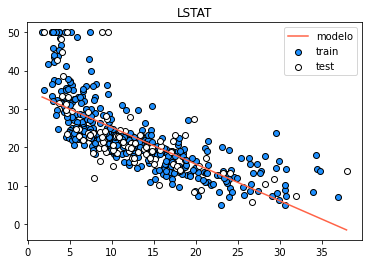

In [158]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x, linear_regressor.predict(x), color="tomato", label="modelo")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [159]:
from sklearn.metrics import mean_squared_error

train_errors = []
test_errors = []
degrees = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [160]:
train_errors, test_errors

([85.1437202235075,
  36.523966406959666,
  28.18917233416823,
  26.784846496749747,
  25.849432858865953,
  25.034962537749614,
  25.014028004243634,
  25.013534969613985,
  24.84582297823018,
  24.825741590891166,
  30.32252544915429,
  57.97427490462615,
  205.25430036566834,
  270.4937762237057,
  409.5831267321385,
  440.84493825016904,
  465.99041754740534,
  500.95386899523567,
  513.3099509098574,
  523.7265267685469],
 [81.58231743908232,
  46.33630536002591,
  38.84686866170723,
  37.22424226843701,
  34.70486859793429,
  34.83470819739069,
  34.32620702658124,
  34.2611233379014,
  36.41569660300828,
  34.862363606242795,
  60.83570779362019,
  456.8288777503474,
  4270.273529816012,
  11499.48085377315,
  7781.686354193338,
  13238.989622335042,
  18112.888889105914,
  29618.290166797553,
  47221.35652826059,
  84721.97297732181])

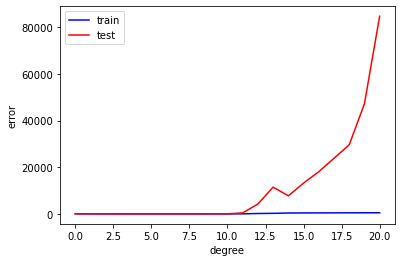

In [161]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Como puede observarse en el gráfico, a partir del grado 13 hay sobreajuste. Se puede ver que el error en entrenamiento se mantiene, pero el error en evaluación tiene un punto de quiebre a partir del cual comienza a crecer.

#### Reconstrucción del modelo

Reconstruimos el modelo que mejor ajusta, utilizando el grado asociado al menor error en evaluación. 

In [162]:
opt_degree = test_errors.index(min(test_errors))
opt_degree

7

In [163]:
pf2 = PolynomialFeatures(opt_degree)
lr2 = LinearRegression(fit_intercept=False)
model = make_pipeline(pf2, lr2)
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression(fit_intercept=False))])

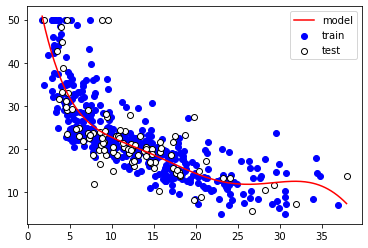

In [164]:
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

El modelo performa mucho mejor que utilizando la regresion lineal simple. Se obtiene un buen valor de RMSE para predecir a partir de un unico atributo.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [165]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LTSAT')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 1), (102, 1))

In [166]:
x_fs=data[['RM', 'LSTAT']]
X_train_fs,X_test_fs,y_train_fs,y_test_fs=train_test_split(x_fs, y, train_size=0.8, random_state=0)

In [167]:
degrees=25
error_results= [train_and_predict(i,X_train_fs,X_test_fs,y_train_fs,y_test_fs)[0] for i in range (1,degrees)]
error_results

[37.383105638779945,
 28.14497186312348,
 28.567166435322516,
 33.99923339387149,
 34.20141106095061,
 34.92285435672572,
 70.26634144388495,
 548.869717456361,
 1105.6575384489695,
 1763.0504720147608,
 119160.11213338381,
 93545.4928454065,
 14250856.628801692,
 490424.8062565465,
 299641759.4864308,
 18317937.272255626,
 1723307231.0553715,
 1133952173.349071,
 1794135744.1984158,
 13031276621.53961,
 357688949405.2439,
 30020123865.75303,
 71495718940.00308,
 861800761155.512]

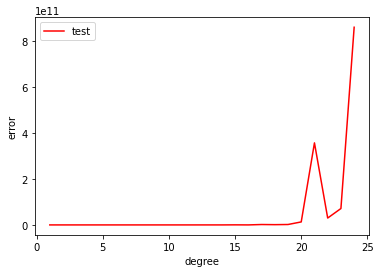

In [168]:
degrees_list=[i for i in range(1,degrees)]
plt.plot(degrees_list, error_results, color="red", label="test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Si, se obtuvieron mejores resultados para la regresion polinomial, por que ya al tener en cuenta otro atributo se genera mas informacion para que el modelo pueda aprender. El nuevo grado óptimo, o el que genera un RMCE menor, es 1. 

In [127]:
opt_degree_fs = error_results.index(min(error_results))
opt_degree_fs

1

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [22]:
#Ejercicio 6


In [23]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [24]:
degrees=10
error_results= [train_and_predict(i,X_train,X_test,y_train,y_test)[0] for i in range (1,degrees)]
error_results

[33.448979997676645,
 31.27781497075713,
 976575.8771388022,
 950756.9075611321,
 195453.6390365556,
 200691.24234269088,
 24919.630059351628,
 142027.86249336068,
 469490.9844347301]

In [33]:
from sklearn.linear_model import Ridge
alpha_coef=[0.0001,0.01, 0.1, 0.5,1, 5, 10, 50, 100]
for alpha in alpha_coef:
    clf=Ridge(alpha=alpha)
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    print(metrics.mean_squared_error(y_test, predictions))

33.449080221931546
33.45900094169788
33.54848836591606
33.902745172431665
34.231606110615395
35.178583234832594
35.52513234300501
36.608774159765574
37.51239731373681
